# House Price Predictions

Data fields  
Here's a brief version of what you'll find in the data description file.  
  
SalePrice - the property's sale price in dollars. This is the target variable to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
Functional: Home functionality rating  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
PavedDrive: Paved driveway  
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  

In [197]:
# remove = ['Neighborhood', 'MasVnrArea', 'YearBuilt','GarageYrBuilt', 'YearRemodAdd', 'YrSold', 'BsmtFullBath', 
#           'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 
#           'GarageYrBlt','LotShape', 'LandSlope', 'ExterCond', 'BsmtCond', 'KitchenAbvGr', 'KitchenQual', 'FireplaceQu']

Importing important libraries that will be used to analyze and predict the final sales price.

In [198]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, f_oneway
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 100)

Then, we will read in the training and testing datasets. We will set our label, which is our target variable, as the 'Sale Price' column from the training data. There will not be 'Sale Price' column in the test dataset because that will be the value we are predicting. The feature columns are set to the whole training dataset but dropping the target variable column.

In [199]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
label = train['SalePrice']

<h1> EDA </h1>

In [200]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [201]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [202]:
print(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [203]:
print(test.info())
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [204]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


<h1> Missing Values </h1>

The shape of the training data is printed to see how many rows and columns we are dealing with.  
A heatmap is created using seaborn to give a visualization of the null values throughout the dataset.

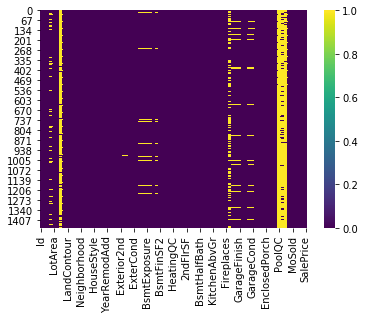

In [205]:
sns.heatmap(train.isnull(), cmap='viridis')

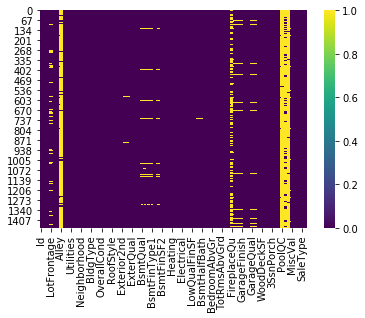

In [206]:
sns.heatmap(test.isnull(), cmap='viridis')

Next, let's see how many null values are in each column.

In [207]:
train_null = train.isnull().sum()
train_null[train_null > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [208]:
test_null = test.isnull().sum()
test_null[test_null > 0].sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

##### Test Data

Upon examination of the descriptions of these columns missing values, it is determined that the house does not have those features. Therefore, we will fill the null values with either 0 for numeric columns or 'None' for categorical columns.  
However, there are some exceptions.

In [209]:
one_null = ['Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'KitchenQual', 'GarageCars', 'GarageArea', 'SaleType']

test[test[one_null].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1029,2490,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


Row 95 is missing KitchenQual. Row 660 is missing BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF. Row 691 is missing Exterior1st, Exterior2nd. Row 1029 is missing SaleType. Row 1116 is missing GarageCars, GarageArea.  
Checking out the foundation type of Row 691 and then check to see what the most common Exterior1st is amongst rows with the same foundation type. We will fill in the Exterior1st missing value with the mode.

In [210]:
test[test['Exterior1st'].isnull()]['Foundation']

691    PConc
Name: Foundation, dtype: object

In [211]:
print(test[test['Foundation']=='PConc']['Exterior1st'].mode())
test['Exterior1st'].fillna(value='VinylSd', inplace=True)
print(test[test['Exterior1st']=='VinylSd']['Exterior2nd'].mode())
test['Exterior2nd'].fillna(value='VinylSd', inplace=True)

0    VinylSd
dtype: object
0    VinylSd
dtype: object


Row 660 is missing a lot of basement related values. We will see if the BsmtQual is also null because that means it does not have a basement.

In [212]:
test[test['Id']==2121][['BsmtQual','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
660,NaN,NaN,NaN,NaN,NaN


In [213]:
test[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].fillna(value=0, inplace=True)

In [214]:
print(test[test['KitchenQual'].isnull()]['KitchenAbvGr'])
print(test[test['KitchenAbvGr']==1]['KitchenQual'].mode())
test['KitchenQual'].fillna(value='TA', inplace=True)

95    1
Name: KitchenAbvGr, dtype: int64
0    TA
dtype: object


In [215]:
test[test['Id']==2577][['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual', 'GarageCars', 'GarageArea']]

,GarageType,GarageFinish,GarageCond,GarageQual,GarageCars,GarageArea
1116,Detchd,NaN,NaN,NaN,NaN,NaN


It is missing a lot of garage values which usually means there is no garage. However, with row 1116, it has a garagetype but no other values. Therefore, we will fill the rest with the mode/median of garages with the same type.

In [216]:
print(test[test['GarageType']=='Detchd']['GarageCars'].mode())
print(test[test['GarageType']=='Detchd']['GarageArea'].median())

0    1.0
dtype: float64
384.0


In [217]:
test['GarageCars'].fillna(value=1, inplace=True)
test['GarageArea'].fillna(value=384, inplace=True)

In [218]:
print(test[test['Id']==2490]['SaleCondition'])
print(test[test['SaleCondition']=='Normal']['SaleType'].mode())
test['SaleType'].fillna(value='WD', inplace=True)

1029    Normal
Name: SaleCondition, dtype: object
0    WD
dtype: object


In [219]:
two_null = ['Utilities', 'BsmtFullBath', 'BsmtHalfBath', 'Functional']

test[test[two_null].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
485,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


Utilities only have two values: AllPub or NoSeWa.

In [220]:
print(test['Utilities'].mode())
test['Utilities'].fillna(value='AllPub', inplace=True)

0    AllPub
dtype: object


For BsmtFullBath and BsmtHalfBath, it would be sensible that if there is no basement, there will not be any basement bathrooms. We can check for rows where BsmtQual is null (meaning no basement) and see what the bathroom values are.

In [221]:
test[test['BsmtQual'].isnull()]['BsmtFullBath'].value_counts()

0.0    42
Name: BsmtFullBath, dtype: int64

It seems we are correct! We will go ahead and fill the nulls with 0.0, representing none.

In [222]:
test[['BsmtFullBath', 'BsmtHalfBath']].fillna(value=0, inplace=True)

Since functionality rating of a home can be very different between similar types, we will use the mode to fill in the null values.

In [223]:
print(test['Functional'].value_counts())
test['Functional'].fillna(value='Typ', inplace=True)

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


MSZoning also shouldn't have any nulls because all of them should have a label.

In [224]:
test[test['MSZoning'].isnull()][['LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood']]

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood
455,109.0,21780,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR
756,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR
790,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR
1444,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel


In [225]:
test[test['Neighborhood']=='IDOTRR']['MSZoning'].value_counts()

RM         40
C (all)    13
Name: MSZoning, dtype: int64

In [226]:
test['MSZoning'].fillna(value='RM', inplace=True)

##### Train Data

Now we will move on to cleaning the missing data from the training dataframe. In train, the exception is the 'Electrical' column in the train data. In the description, it does not have an option for no electrical system.
Let's see what is going on in that row.

In [227]:
train[train['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


To fill in the one missing value, we can try using the mode. To make it as accurate as possible, we will look at all rows with the same MsSubClass, the type of dwelling. We can then see what the mode is amongst rows of the same MsSubClass.

Basically all housing with MsSubClass 80, which is a split or multi-level dwelling, has Standard Circuit Breakers & Romex (SBrkr) for the electrical system. So we will fill in the null value with 'SBrKr'. Double check to make sure the value was changed.

In [228]:
train[train['MSSubClass'] == 80]['Electrical']
train['Electrical'].fillna(value='SBrKr', inplace=True)

<h3> Other Missing Values </h3>  

The percentage of null values per column can be calculated.

In [229]:
perc_null = (train_null.sort_values(ascending=False) / 1460) * 100
perc_null[perc_null > 50.0]

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
dtype: float64

In [230]:
test_perc_null = (test_null.sort_values(ascending=False) / 1460) * 100
test_perc_null[test_perc_null > 50.0]

PoolQC         99.726027
MiscFeature    96.438356
Alley          92.602740
Fence          80.068493
dtype: float64

In [231]:
col_w_null = train_null[train_null > 0].keys()
test_col_w_null = test_null[test_null > 0].keys()

for col in col_w_null:
    if train[col].dtypes == float:
        train[col].fillna(value=0, inplace=True)

for col in col_w_null:
    if train[col].dtypes == object:
        train[col].fillna(value='None', inplace=True)

train[col_w_null].count()

LotFrontage     1460
Alley           1460
MasVnrType      1460
MasVnrArea      1460
BsmtQual        1460
BsmtCond        1460
BsmtExposure    1460
BsmtFinType1    1460
BsmtFinType2    1460
Electrical      1460
FireplaceQu     1460
GarageType      1460
GarageYrBlt     1460
GarageFinish    1460
GarageQual      1460
GarageCond      1460
PoolQC          1460
Fence           1460
MiscFeature     1460
dtype: int64

In [232]:
train['BsmtExposure'].value_counts(dropna=False)

No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [233]:
for col in test_col_w_null:
    if test[col].dtypes == float:
        test[col].fillna(value=0, inplace=True)

for col in test_col_w_null:
    if test[col].dtypes == object:
        test[col].fillna(value='None', inplace=True)

test[test_col_w_null].count()

MSZoning        1459
LotFrontage     1459
Alley           1459
Utilities       1459
Exterior1st     1459
Exterior2nd     1459
MasVnrType      1459
MasVnrArea      1459
BsmtQual        1459
BsmtCond        1459
BsmtExposure    1459
BsmtFinType1    1459
BsmtFinSF1      1459
BsmtFinType2    1459
BsmtFinSF2      1459
BsmtUnfSF       1459
TotalBsmtSF     1459
BsmtFullBath    1459
BsmtHalfBath    1459
KitchenQual     1459
Functional      1459
FireplaceQu     1459
GarageType      1459
GarageYrBlt     1459
GarageFinish    1459
GarageCars      1459
GarageArea      1459
GarageQual      1459
GarageCond      1459
PoolQC          1459
Fence           1459
MiscFeature     1459
SaleType        1459
dtype: int64

In [234]:
test['BsmtExposure'].value_counts(dropna=False)

No      951
Av      197
Gd      142
Mn      125
None     44
Name: BsmtExposure, dtype: int64

<h2> Target Variable </h2>

In [235]:
label.isnull().any()

False

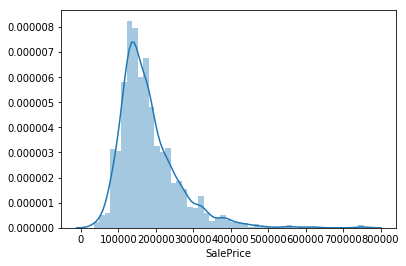

Skew:  1.8828757597682129
Kurtosis:  6.536281860064529


In [236]:
sns.distplot(label)
plt.show()
print('Skew: ', label.skew())
print('Kurtosis: ', label.kurt())
#https://www.itl.nist.gov/div898/handbook/eda/eda.htm

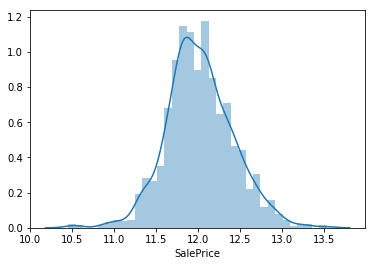

Skew:  0.12134661989685329
Kurtosis:  0.809519155707878


In [237]:
sns.distplot(np.log1p(label))
plt.show()
print('Skew: ', np.log1p(label).skew())
print('Kurtosis: ', np.log1p(label).kurt())

    MSSubClass seem to have numerical values but they represent classes that is not higher than one another
    MSSubClass:
    20  1-STORY 1946 & NEWER ALL STYLES
    30  1-STORY 1945 & OLDER
    40  1-STORY W/FINISHED ATTIC ALL AGES
    45  1-1/2 STORY - UNFINISHED ALL AGES
    50  1-1/2 STORY FINISHED ALL AGES
    60  2-STORY 1946 & NEWER
    70  2-STORY 1945 & OLDER
    75  2-1/2 STORY ALL AGES
    80  SPLIT OR MULTI-LEVEL
    85  SPLIT FOYER
    90  DUPLEX - ALL STYLES AND AGES
    120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150  1-1/2 STORY PUD - ALL AGES
    160  2-STORY PUD - 1946 & NEWER
    180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190  2 FAMILY CONVERSION - ALL STYLES AND AGES
    
    We will map the numbers into strings and combine similar categories.

In [238]:
map_dict = {}
map_dict.update(map_dict.fromkeys({20,30,40,120}, '1-Story'))
map_dict.update(map_dict.fromkeys({45,50,150}, '1.5-Story'))
map_dict.update(map_dict.fromkeys({60,70,75,160}, '2-Story'))
map_dict.update(map_dict.fromkeys({80,85,180}, 'Split/Multilevel'))
map_dict.update(map_dict.fromkeys({90,190}, 'Other'))
map_dict

{40: '1-Story',
 20: '1-Story',
 120: '1-Story',
 30: '1-Story',
 50: '1.5-Story',
 45: '1.5-Story',
 150: '1.5-Story',
 160: '2-Story',
 75: '2-Story',
 60: '2-Story',
 70: '2-Story',
 80: 'Split/Multilevel',
 180: 'Split/Multilevel',
 85: 'Split/Multilevel',
 90: 'Other',
 190: 'Other'}

In [239]:
train['MSSubClass'] = train['MSSubClass'].map(map_dict)
train['MSSubClass'].value_counts(dropna=False)

test['MSSubClass'] = test['MSSubClass'].map(map_dict)
test['MSSubClass'].value_counts(dropna=False)

1-Story             710
2-Story             416
1.5-Story           150
Split/Multilevel     95
Other                88
Name: MSSubClass, dtype: int64

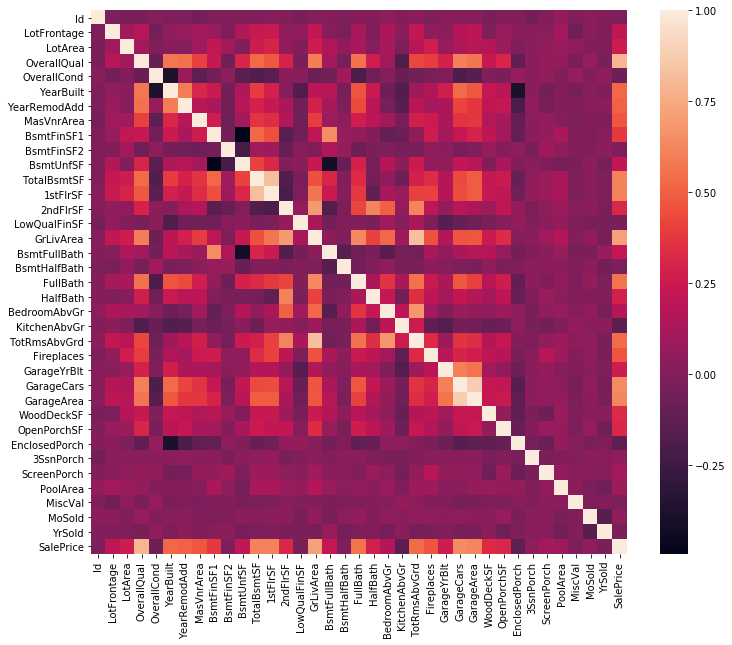

In [240]:
#See correlation with SalePrice
plt.figure(figsize=(12,10))
sns.heatmap(train.corr())

In [241]:
train.corr()['SalePrice'].sort_values(ascending=False).head()

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

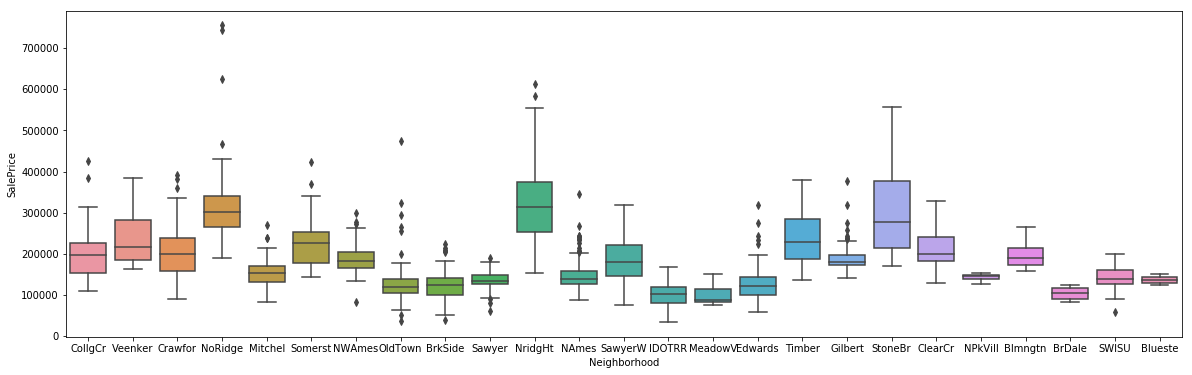

In [242]:
plt.figure(figsize=(20,6))
sns.boxplot(y='SalePrice', x='Neighborhood', data=train)

In [243]:
print(train['MasVnrType'].value_counts())

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


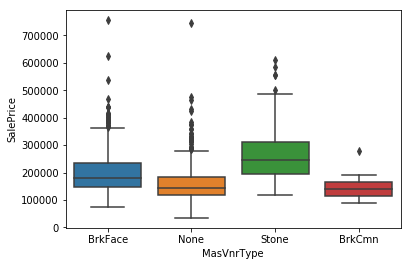

In [244]:
sns.boxplot(x='MasVnrType', y='SalePrice', data=train)

There is definitely class imbalance within the MasVnrType column as well as some outliers.

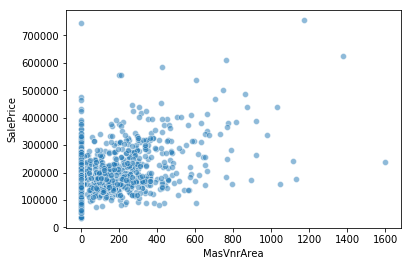

In [245]:
sns.scatterplot('MasVnrArea', 'SalePrice', data=train, alpha=0.5)

In [246]:
train[['MasVnrArea', 'SalePrice']].corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.472614
SalePrice,0.472614,1.000000


MasVnrArea might have a slight correlation to the SalePrice. However, it is not clear.

##### Feature Engineering

Examining the columns, there are definitely potentially more useful columns that can be created given the information we have. For one, we know when houses are built and when they are sold.  

People always consider buying things new or used. So the same goes for houses in a way! The age of the homes matter to the buyers. We will create the column 'HomeAge' and see if the correlation improves.

In [247]:
train['HomeAge'] = train['YrSold'] - train['YearBuilt']
train.head()

test['HomeAge'] = test['YrSold'] - test['YearBuilt']
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HomeAge
0,1461,1-Story,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,49
1,1462,1-Story,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,52
2,1463,2-Story,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,13
3,1464,2-Story,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,12
4,1465,1-Story,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,18


In [248]:
train[['YrSold','SalePrice']].corr()

,YrSold,SalePrice
YrSold,1.000000,-0.028923
SalePrice,-0.028923,1.000000


In [249]:
train[['HomeAge', 'SalePrice']].corr()

,HomeAge,SalePrice
HomeAge,1.00000,-0.52335
SalePrice,-0.52335,1.00000


Let's check if any funky values appeared from our aggregation (houses with age below 0)

In [250]:
train[train['HomeAge'] < 0][['YearBuilt', 'YrSold', 'HomeAge']]

,YearBuilt,YrSold,HomeAge


In [251]:
test[test['HomeAge'] < 0][['YearBuilt', 'YrSold', 'HomeAge', 'SaleType', 'SaleCondition']]

,YearBuilt,YrSold,HomeAge,SaleType,SaleCondition
1089,2008,2007,-1,New,Partial


Seems like a house got sold before it was built! We will simply say the age is zero in that case.

In [252]:
for value in test['HomeAge']:
    if value < 0:
        test['HomeAge'].replace(value, 0, inplace=True)

In [253]:
#fixing an input error with a row in the test data
test['GarageYrBlt'].replace(2207, 2007, inplace=True)
test[test['Id']==2593]['GarageYrBlt']

1132    2007.0
Name: GarageYrBlt, dtype: float64

Similar to what we did with the house age, we will apply the same method to the garage.

In [254]:
train['GarageAge'] = train['YrSold'] - train['GarageYrBlt']
train.head()

test['GarageAge'] = test['YrSold'] - test['GarageYrBlt']
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HomeAge,GarageAge
0,1461,1-Story,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,49,49.0
1,1462,1-Story,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,52,52.0
2,1463,2-Story,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,13,13.0
3,1464,2-Story,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,12,12.0
4,1465,1-Story,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,18,18.0


Let us check for those funky numbers again. We want to know if there are garage ages younger than 0 and since we know some houses do not contain garages, their aggregation of the age column will have some odd values as well.

In [255]:
print(train[train['GarageAge'] < 0][['GarageYrBlt', 'YrSold', 'GarageAge']])
train[train['GarageAge'] > 1000][['GarageYrBlt', 'YrSold', 'GarageAge']].count()

Empty DataFrame
Columns: [GarageYrBlt, YrSold, GarageAge]
Index: []


GarageYrBlt    81
YrSold         81
GarageAge      81
dtype: int64

In [256]:
print(test[test['GarageAge'] < 0][['Id','GarageYrBlt', 'YrSold', 'GarageAge']])
test[test['GarageAge'] > 1000][['Id','GarageYrBlt', 'YrSold', 'GarageAge']].count()

        Id  GarageYrBlt  YrSold  GarageAge
1089  2550       2008.0    2007       -1.0


Id             78
GarageYrBlt    78
YrSold         78
GarageAge      78
dtype: int64

Seems like there are a bit of garages that are more than a thousand years old, which means the YrSold was subtracted by a zero.

In [257]:
for value in test['GarageAge']:
    if value > 1000:
        test['GarageAge'].replace(value, 0, inplace=True)
    if value < 0:
        test['GarageAge'].replace(value, 0, inplace=True)

for value in train['GarageAge']:
    if value > 1000:
        train['GarageAge'].replace(value, 0, inplace=True)

##### Binary Values

In [258]:
train['drivepaved'] = train['PavedDrive'].apply(lambda x: 0 if x == 'N' else 1)
# train['PavedDrive'].replace(['N', 'Y', 'P'], [0,1,1], inplace=True)
print('train', train['drivepaved'].value_counts(dropna=False))

test['drivepaved'] = test['PavedDrive'].apply(lambda x: 0 if x == 'N' else 1)
# test['PavedDrive'].replace(['N', 'Y', 'P'], [0,1,1], inplace=True)
print('test', test['drivepaved'].value_counts(dropna=False))

# drop 'PavedDrive'

train 1    1370
0      90
Name: drivepaved, dtype: int64
test 1    1333
0     126
Name: drivepaved, dtype: int64


In [259]:
train['hasutil'] = train['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)
# train['Utilities'].replace(['AllPub', 'NoSeWa'], [1, 0], inplace=True)
print(train['hasutil'].value_counts(dropna=False))

test['hasutil'] = test['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)
# test['Utilities'].replace(['AllPub', 'NoSeWa'], [1, 0], inplace=True)
print(test['hasutil'].value_counts(dropna=False))

# drop 'Utilities'

1    1459
0       1
Name: hasutil, dtype: int64
1    1459
Name: hasutil, dtype: int64


In [260]:
train['CentralAir'] = enc.fit_transform(train['CentralAir'])
print(train['CentralAir'].value_counts(dropna=False))

test['CentralAir'] = enc.fit_transform(test['CentralAir'])
print(test['CentralAir'].value_counts(dropna=False))

1    1365
0      95
Name: CentralAir, dtype: int64
1    1358
0     101
Name: CentralAir, dtype: int64


In [261]:
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# for val in train[train['PoolArea'] > 0]['PoolArea']:
#     train['PoolArea'].replace(val, 1, inplace=True)
print(train['haspool'].value_counts(dropna=False))

test['haspool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# for val in test[test['PoolArea'] > 0]['PoolArea']:
#     test['PoolArea'].replace(val, 1, inplace=True)
print(test['haspool'].value_counts(dropna=False))

# drop 'PoolArea'

0    1453
1       7
Name: haspool, dtype: int64
0    1453
1       6
Name: haspool, dtype: int64


##### Discrete Values

A few more columns we can create are combining the total number of bathrooms in a household and also the total area the buyer gets of porch/deck area.

In [262]:
print(train['BsmtFullBath'].value_counts())
train['BsmtHalfBath'].value_counts(dropna=False)

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [263]:
train['Bathrooms'] = train['BsmtFullBath'] + train['BsmtHalfBath']*0.5 + train['FullBath'] + train['HalfBath']*0.5

test['Bathrooms'] = test['BsmtFullBath'] + test['BsmtHalfBath']*0.5 + test['FullBath'] + test['HalfBath']*0.5

train.corr()['Bathrooms']['SalePrice']

0.6317310679319897

In [264]:
train['TotalPorchSF'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

test['TotalPorchSF'] = test['WoodDeckSF'] + test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

print(train.corr()['TotalPorchSF']['SalePrice'])

0.3909930203595835


In [265]:
print(train.corr()['TotRmsAbvGrd']['SalePrice'])
train['TotRmsAbvGrd'].value_counts(dropna=False)

0.5337231555820238


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

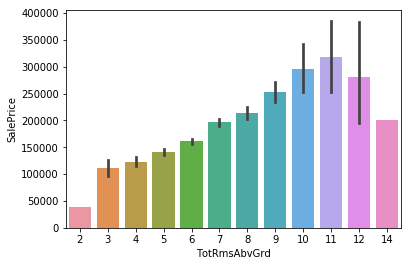

In [266]:
sns.barplot(x='TotRmsAbvGrd', y='SalePrice', data=train)

It looks like there is a steady increase in SalePrice as the total number of rooms increase but there is a max point at which the SalePrice begins to decrease once again.  

This could be due to the fact that not many people need more rooms than 11.

In [267]:
print(train['GarageCars'].value_counts(dropna=False))
train.corr()['GarageCars']['SalePrice']

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


0.640409197258349

-0.1359073708421417


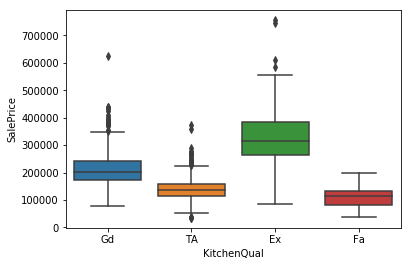

In [268]:
print(train.corr()['KitchenAbvGr']['SalePrice'])
sns.boxplot(x='KitchenQual', y='SalePrice', data=train)

In [269]:
train['Fireplaces'].value_counts(dropna=False)

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

0.4669288367515242


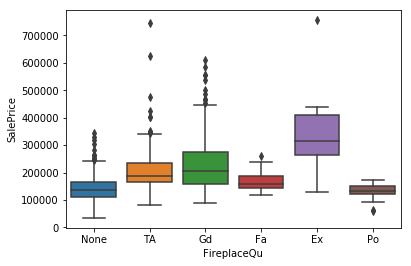

In [270]:
print(train.corr()['Fireplaces']['SalePrice'])
sns.boxplot(x='FireplaceQu', y='SalePrice',data=train)

In [271]:
cat_to = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual',
          'FireplaceQu', 'GarageQual', 'GarageCond','PoolQC']
for x in cat_to:
    print(train[x].value_counts())
print('\n')
for x in cat_to:
    print(test[x].value_counts())

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64
TA      1311
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64
None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64


TA    892
Gd    491
Ex     55
Fa     21
Name: ExterQual, dtype: int64
TA    1256
Gd     153
Fa      39
Ex  

Each of these columns contain ordinal values. We can change them from string to numeric variables so it would be easier for the model to utilize.

In [272]:
qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
for col in cat_to:
    train[col] = train[col].map(qual_map)
    print(train[col].value_counts(dropna=False))
    print(train.corr()[col]['SalePrice'])
    print('\n')
    
for col in cat_to:
    test[col] = test[col].map(qual_map)
    print(test[col].value_counts(dropna=False))
    print('\n')

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64
0.6826392416562591


3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64
0.018899118482413147


3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64
0.5852071991725148


3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64
0.2126071564855757


5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64
0.4276487073988049


3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64
0.6595997207286572


0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64
0.5204376059504007


3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64
0.27383907400622587


3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64
0.26319078447040084


0    1453
4       3
5       2
2       2
Name: PoolQC, dtype: int64
0.11169583806227092


3    892

In [273]:
morecols = ['LotShape', 'LandSlope', 'BsmtExposure']
for x in morecols:
    print(train[x].value_counts(dropna=False))
    
for x in morecols:
    print(test[x].value_counts(dropna=False))

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64
No      951
Av      197
Gd      142
Mn      125
None     44
Name: BsmtExposure, dtype: int64


Once again, there seems to be an order of significance within the labels.

In [274]:
lotshape_map = {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3}
train['LotShape'] = train['LotShape'].map(lotshape_map)
print(train['LotShape'].value_counts(dropna=False))
print(train.corr()['LotShape']['SalePrice'])

test['LotShape'] = test['LotShape'].map(lotshape_map)
print(test['LotShape'].value_counts(dropna=False))

0    925
1    484
2     41
3     10
Name: LotShape, dtype: int64
0.26775931391782054
0    934
1    484
2     35
3      6
Name: LotShape, dtype: int64


In [275]:
landslope_map = {'Gtl': 0, 'Mod': 1, 'Sev': 2}
train['LandSlope'] = train['LandSlope'].map(landslope_map)
print(train['LandSlope'].value_counts(dropna=False))
print(train.corr()['LandSlope']['SalePrice'])

test['LandSlope'] = test['LandSlope'].map(landslope_map)
print(test['LandSlope'].value_counts(dropna=False))

0    1382
1      65
2      13
Name: LandSlope, dtype: int64
0.05115224817946586
0    1396
1      60
2       3
Name: LandSlope, dtype: int64


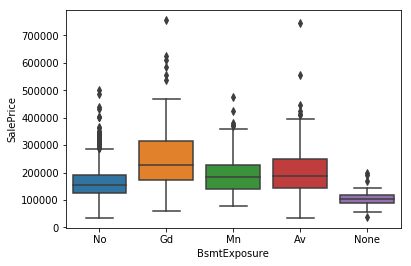

In [276]:
sns.boxplot(x='BsmtExposure', y='SalePrice', data=train)

In [277]:
bsmtexp_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
train['BsmtExposure'] = train['BsmtExposure'].map(bsmtexp_map)
print(train['BsmtExposure'].value_counts(dropna=False))
print(train.corr()['BsmtExposure']['SalePrice'])

test['BsmtExposure'] = test['BsmtExposure'].map(bsmtexp_map)
print(test['BsmtExposure'].value_counts(dropna=False))

1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64
0.3746962210008844
1    951
3    197
4    142
2    125
0     44
Name: BsmtExposure, dtype: int64


In [278]:
train[morecols].corr()

,LotShape,LandSlope,BsmtExposure
LotShape,1.000000,0.144248,0.183540
LandSlope,0.144248,1.000000,0.261883
BsmtExposure,0.183540,0.261883,1.000000


The correlations are still pretty low. Let's take a look at the top 15 correlations.

In [279]:
train.corr()['SalePrice'].sort_values(ascending=False).head(16)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
Bathrooms       0.631731
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [280]:
train.corr().style.background_gradient(cmap='coolwarm')

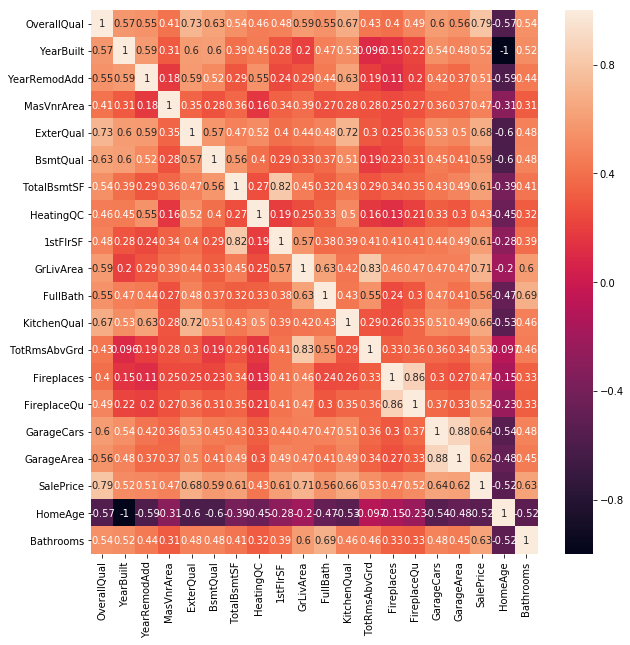

In [281]:
train_corr = train.corr()
high_corr = train_corr.index[abs(train_corr['SalePrice']) > 0.4]
plt.figure(figsize=(10,10))
sns.heatmap(train[high_corr].corr(), annot=True)

We will create separate variables for numeric column names and categorical column names. This will help when we need to encode them later.

In [282]:
num_cols = [c for c in train.drop('Id', axis=1) if train.dtypes[c] != object]
print(num_cols)
print('\n')
cat_cols = [c for c in train if train.dtypes[c] == object]
print(cat_cols)

['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'HomeAge', 'GarageAge', 'drivepaved', 'hasutil', 'haspool', 'Bathrooms', 'TotalPorchSF']


['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType

Outliers will be dropped if they will not affect the correlation as much.

In [283]:
train = train.drop(train[train['LotFrontage'] > 270].index)

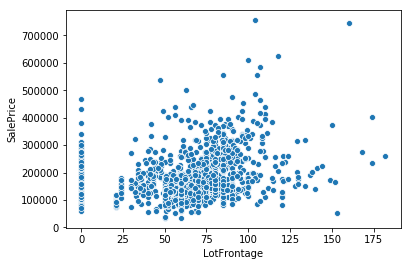

In [284]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=train)

0.367532615241327


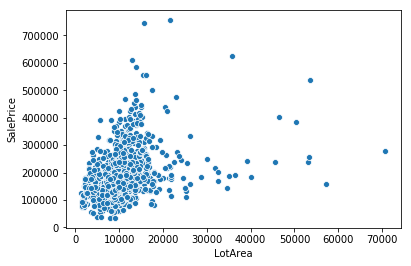

In [285]:
train = train.drop(train[train['LotArea'] > 100000].index)
print(train.corr()['LotArea']['SalePrice'])
sns.scatterplot(x='LotArea', y='SalePrice', data=train)

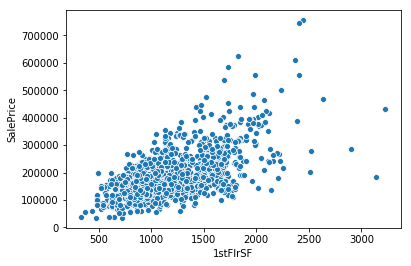

In [286]:
train[train['1stFlrSF'] > 4000]
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=train)

0.7345816239958749


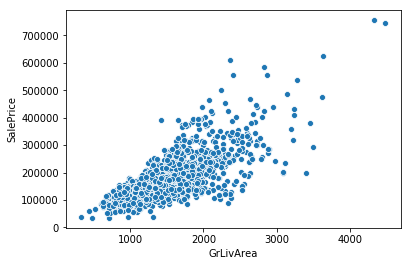

In [287]:
train = train.drop(train[(train['SalePrice'] < 200000) & (train['GrLivArea'] > 4000)].index)
print(train.corr()['GrLivArea']['SalePrice'])
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

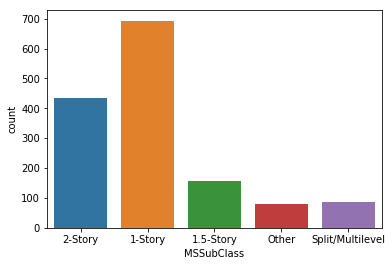

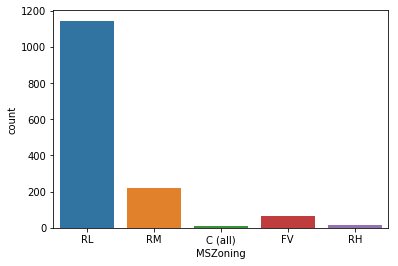

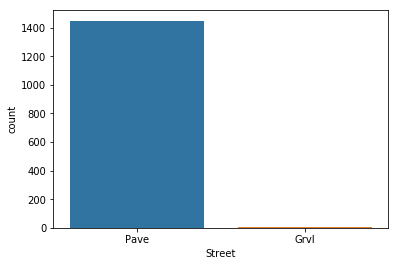

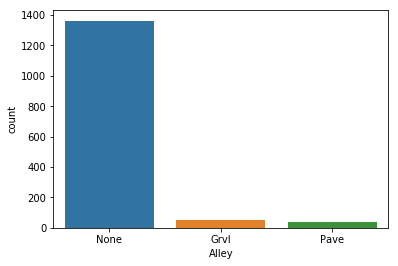

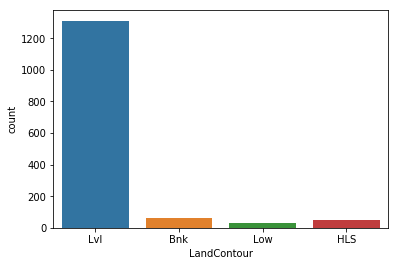

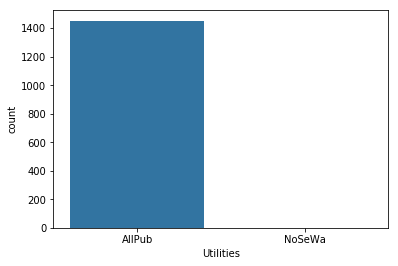

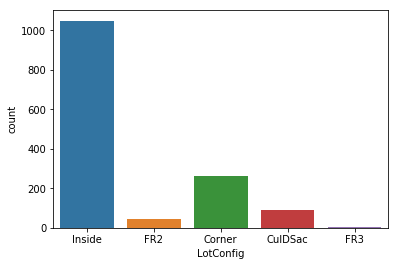

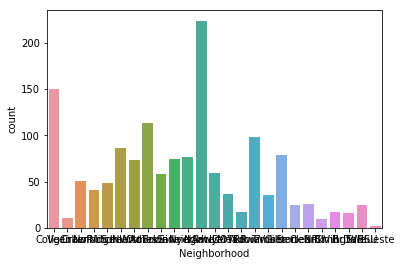

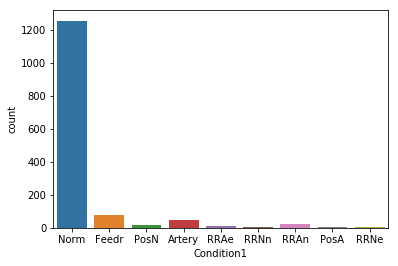

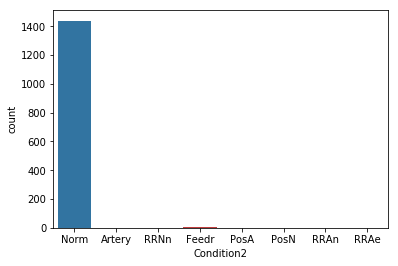

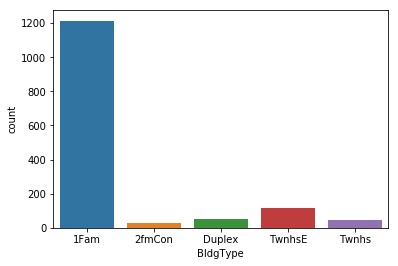

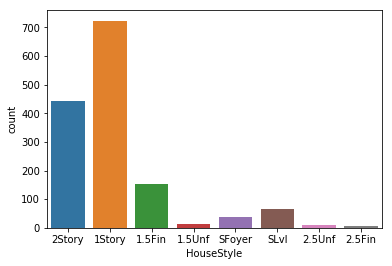

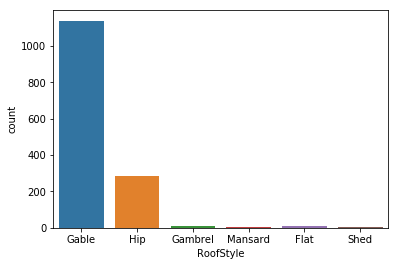

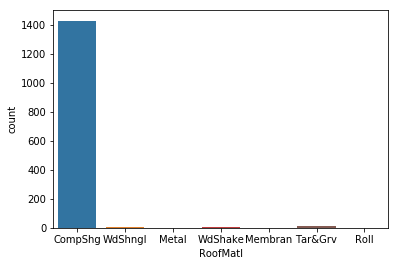

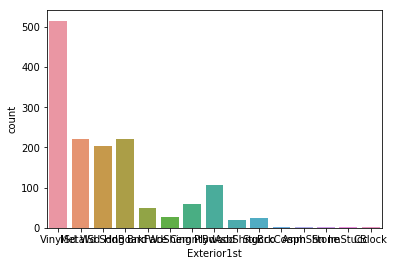

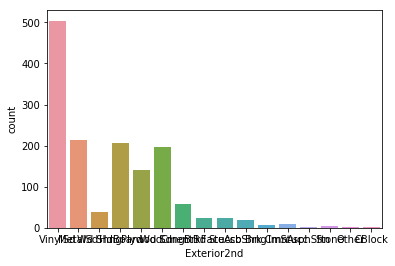

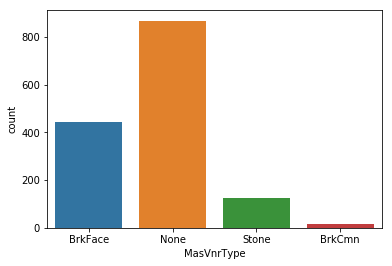

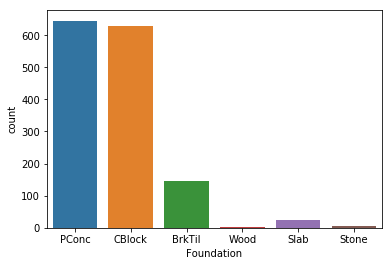

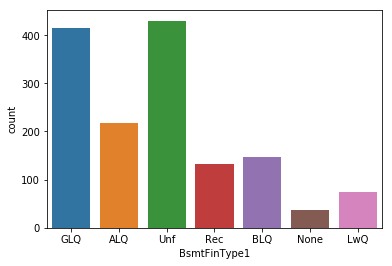

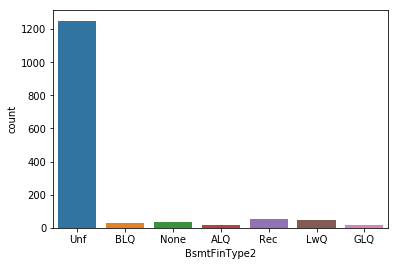

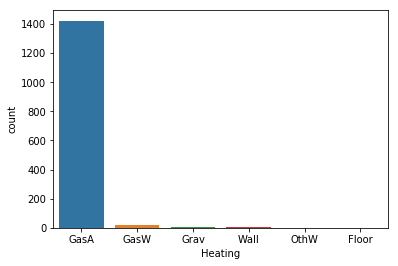

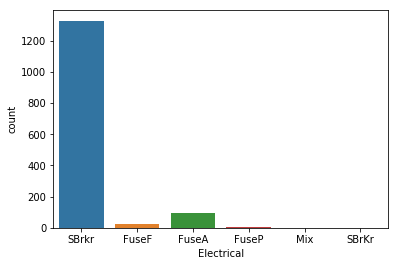

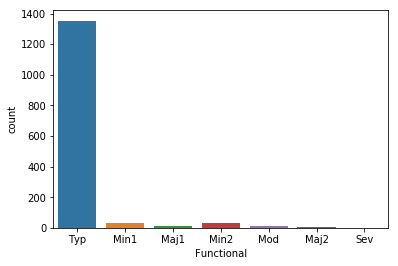

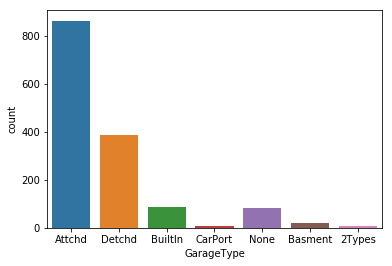

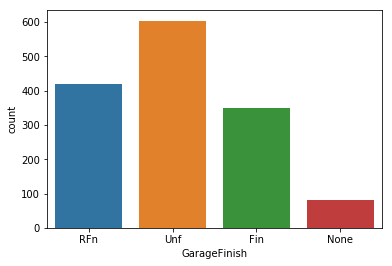

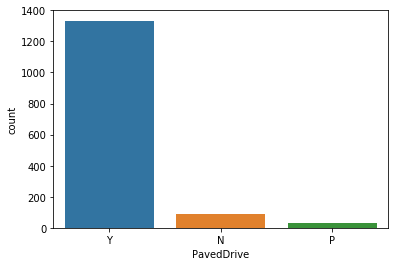

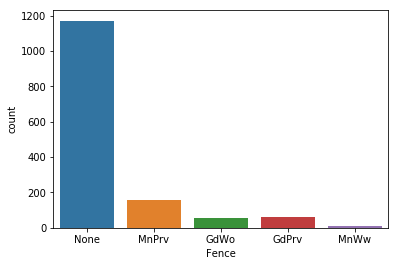

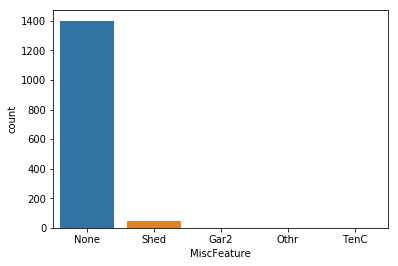

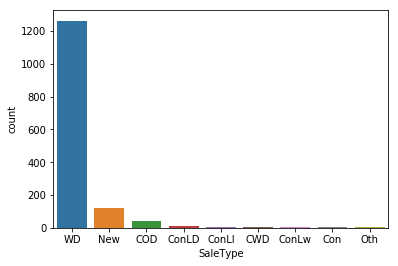

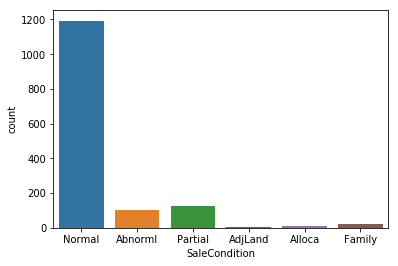

In [288]:
for col in cat_cols:
    sns.countplot(x=col, data=train)
    plt.show()

In [289]:
skewed = train[num_cols].apply(lambda x: skew(x))
skewed = skewed[skewed >0.75].index

In [312]:
# skew_test = skewed.delete(-3)
train[skewed] = np.log1p(train[skewed])
test[skew_test] = np.log1p(test[skew_test])

<h2> Feature Preparation </h2>

In [313]:
from sklearn import preprocessing

Drop columns where we created a new calculated column.

In [314]:
drop_cols = ['Id','LotArea', 'LotFrontage','Neighborhood','Exterior2nd','BldgType','Condition2','ExterCond','BsmtCond',
             'YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold','PavedDrive','Utilities','PoolArea',
             'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
             'MiscVal','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

created = ['Id','Heating','Electrical','Exterior1st','Exterior2nd','Neighborhood','MiscFeature','Condition2','HouseStyle','RoofMatl','YearBuilt',
           'YearRemodAdd','GarageYrBlt','YrSold','PavedDrive','Utilities','PoolArea',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','MiscVal',
           'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

In [315]:
df2 = train.drop(created, axis=1)
test_df = test.drop(created, axis=1)

print(df2.shape)
print(test_df.shape)

(1453, 59)
(1459, 58)


In [316]:
num_cols = [c for c in df2.drop('SalePrice', axis=1) if df2.dtypes[c] != object]
print(num_cols)
print('\n')
cat_cols = [c for c in df2 if df2.dtypes[c] == object]
print(cat_cols)

['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'MoSold', 'HomeAge', 'GarageAge', 'drivepaved', 'hasutil', 'haspool', 'Bathrooms', 'TotalPorchSF']


['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Condition1', 'BldgType', 'RoofStyle', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageType', 'GarageFinish', 'Fence', 'SaleType', 'SaleCondition']


In [317]:
Features = pd.get_dummies(data=df2[cat_cols])
pred_Features = pd.get_dummies(data=test_df[cat_cols])

print(Features.shape)
print(pred_Features.shape)

(1453, 106)
(1459, 106)


In [318]:
Features = np.concatenate([Features, np.array(df2[num_cols])], axis=1)
pred_Features = np.concatenate([pred_Features, np.array(test_df[num_cols])], axis=1)

print(Features.shape)
print(pred_Features.shape)

(1453, 145)
(1459, 145)


<h1> Training Model </h1>

Import Scikit-learn functions that we will be using.

In [319]:
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split

In [320]:
label = np.array(np.log1p(df2['SalePrice']))

X = Features
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [321]:
scaler = preprocessing.StandardScaler().fit(X_train[:, 106:])
X_train[:, 106:] = scaler.transform(X_train[:, 106:])

X_test[:, 106:] = scaler.transform(X_test[:, 106:])
X_train[5]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.  

In [322]:
print(X_train.shape)
print(X_test.shape)
np.argwhere(np.isnan(X_train))

(1017, 145)
(436, 145)


array([], shape=(0, 2), dtype=int64)

<h1> Models </h1>

In [323]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

<h3> Linear Regression </h3>

In [324]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
lin_pred = lin_mod.predict(X_test)

In [325]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
print_metrics(y_test, lin_pred, 0)

# lin_final = lin_mod.predict(pred_Features)
# for x in lin_final:
#     print(round(np.exp(x),3))

Mean Square Error      = 1.504237972041644e-07
Root Mean Square Error = 0.00038784506855723253
Mean Absolute Error    = 0.0002702064085432519
Median Absolute Error  = 0.0002047373033730593
R^2                    = 0.9093260036365324
Adjusted R^2           = 0.9095339715181


<h3> Gradient Boosting Regressor </h3>

In [326]:
GB_regressor = GradientBoostingRegressor(n_estimators = 600, random_state=0)
GB_regressor.fit(X_train, y_train)

GB_regressor.feature_importances_
gbr_pred = GB_regressor.predict(X_test)

In [327]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
print_metrics(y_test, gbr_pred, 0)

# gbr_final = GB_regressor.predict(pred_Features)
# for x in gbr_final:
#     print(round(np.exp(x),3))

Mean Square Error      = 1.9745122459815937e-07
Root Mean Square Error = 0.00044435484086274943
Mean Absolute Error    = 0.0003070116170549636
Median Absolute Error  = 0.0002132975008296567
R^2                    = 0.8809783295333534
Adjusted R^2           = 0.8812513150160751
